In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.size"] = "26"
#plt.rcParams['savefig.facecolor'] = "0.5"
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [2]:
bColor = "red"
oColor = "green"
hColor = "blue"

In [3]:
result = pd.read_csv(r"Substitution/food_vary_m.csv")

In [4]:
result

,Dataset,Number_Of_Candidates,Number_of_voters,Max_Ballot_length,Preferred_winner,Upper_Bound,heuristicV1_margin,Our_margin,Blom_margin,heuristicV1_runtime,...,Blom_runtime,Margin_Blom=Ours,Upper_bound_correct,HeuristicV1_equl_margin,Our_number_LPS,Blom_number_LPS,Our_number_node_explored,Blom_number_node_explored,Our_blom_lb_calls,Blom_Leaf_node_explored
0,food=8_ballot=10bs=4,8,10,4,2,0,0,0.0,0.0,0.000407,...,0.367607,1,1,1,1,54,55,55,53,1
1,food=8_ballot=10bs=4,8,10,4,1,0,0,0.0,0.0,0.000376,...,0.239597,1,1,1,1,54,55,55,53,1
2,food=8_ballot=10bs=4,8,10,4,0,0,0,0.0,0.0,0.000389,...,0.240783,1,1,1,1,54,55,55,53,1
3,food=8_ballot=20bs=4,8,20,4,2,0,0,0.0,0.0,0.000516,...,0.145880,1,1,1,1,35,36,36,34,1
4,food=8_ballot=20bs=4,8,20,4,1,0,0,0.0,0.0,0.000538,...,0.148917,1,1,1,1,35,36,36,34,1
5,food=8_ballot=20bs=4,8,20,4,0,0,0,0.0,0.0,0.000705,...,0.176566,1,1,1,1,35,36,36,34,1
6,food=8_ballot=30bs=4,8,30,4,2,0,0,0.0,0.0,0.001109,...,0.257105,1,1,1,1,44,45,45,43,1
7,food=8_ballot=30bs=4,8,30,4,1,0,0,0.0,0.0,0.000880,...,0.223508,1,1,1,1,44,45,45,43,1
8,food=8_ballot=30bs=4,8,30,4,0,0,0,0.0,0.0,0.000773,...,0.216994,1,1,1,1,44,45,45,43,1
9,food=8_ballot=50bs=4,8,50,4,2,0,0,0.0,0.0,0.001292,...,0.204985,1,1,1,1,48,49,49,47,1


In [5]:
result['margin_difference'] = result['heuristicV1_margin'] - result['Blom_margin']

In [6]:
result

,Dataset,Number_Of_Candidates,Number_of_voters,Max_Ballot_length,Preferred_winner,Upper_Bound,heuristicV1_margin,Our_margin,Blom_margin,heuristicV1_runtime,...,Margin_Blom=Ours,Upper_bound_correct,HeuristicV1_equl_margin,Our_number_LPS,Blom_number_LPS,Our_number_node_explored,Blom_number_node_explored,Our_blom_lb_calls,Blom_Leaf_node_explored,margin_difference
0,food=8_ballot=10bs=4,8,10,4,2,0,0,0.0,0.0,0.000407,...,1,1,1,1,54,55,55,53,1,0.0
1,food=8_ballot=10bs=4,8,10,4,1,0,0,0.0,0.0,0.000376,...,1,1,1,1,54,55,55,53,1,0.0
2,food=8_ballot=10bs=4,8,10,4,0,0,0,0.0,0.0,0.000389,...,1,1,1,1,54,55,55,53,1,0.0
3,food=8_ballot=20bs=4,8,20,4,2,0,0,0.0,0.0,0.000516,...,1,1,1,1,35,36,36,34,1,0.0
4,food=8_ballot=20bs=4,8,20,4,1,0,0,0.0,0.0,0.000538,...,1,1,1,1,35,36,36,34,1,0.0
5,food=8_ballot=20bs=4,8,20,4,0,0,0,0.0,0.0,0.000705,...,1,1,1,1,35,36,36,34,1,0.0
6,food=8_ballot=30bs=4,8,30,4,2,0,0,0.0,0.0,0.001109,...,1,1,1,1,44,45,45,43,1,0.0
7,food=8_ballot=30bs=4,8,30,4,1,0,0,0.0,0.0,0.000880,...,1,1,1,1,44,45,45,43,1,0.0
8,food=8_ballot=30bs=4,8,30,4,0,0,0,0.0,0.0,0.000773,...,1,1,1,1,44,45,45,43,1,0.0
9,food=8_ballot=50bs=4,8,50,4,2,0,0,0.0,0.0,0.001292,...,1,1,1,1,48,49,49,47,1,0.0


In [7]:
result.columns

Index(['Dataset', 'Number_Of_Candidates', 'Number_of_voters',
       'Max_Ballot_length', 'Preferred_winner', 'Upper_Bound',
       'heuristicV1_margin', 'Our_margin', 'Blom_margin',
       'heuristicV1_runtime', 'Our_runtime', 'Blom_runtime',
       'Margin_Blom=Ours', 'Upper_bound_correct', 'HeuristicV1_equl_margin',
       'Our_number_LPS', 'Blom_number_LPS', 'Our_number_node_explored',
       'Blom_number_node_explored', 'Our_blom_lb_calls',
       'Blom_Leaf_node_explored', 'margin_difference'],
      dtype='object')

In [8]:
avg = result.groupby(['Number_of_voters'])['Dataset', 'Number_Of_Candidates', 'Number_of_voters',
       'Max_Ballot_length', 'Preferred_winner', 'Upper_Bound',
       'heuristicV1_margin', 'Our_margin', 'Blom_margin',
       'heuristicV1_runtime', 'Our_runtime', 'Blom_runtime',
       'Margin_Blom=Ours', 'Upper_bound_correct', 'HeuristicV1_equl_margin',
       'Our_number_LPS', 'Blom_number_LPS', 'Our_number_node_explored',
       'Blom_number_node_explored', 'Our_blom_lb_calls',
       'Blom_Leaf_node_explored', 'margin_difference'].mean()

C:\Users\mouin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [9]:
avg.to_csv('tempAvgmovie=10.csv')

In [10]:
avgDf = pd.read_csv('tempAvgmovie=10.csv')
avgDf

,Number_of_voters,Number_Of_Candidates,Number_of_voters.1,Max_Ballot_length,Preferred_winner,Upper_Bound,heuristicV1_margin,Our_margin,Blom_margin,heuristicV1_runtime,...,Margin_Blom=Ours,Upper_bound_correct,HeuristicV1_equl_margin,Our_number_LPS,Blom_number_LPS,Our_number_node_explored,Blom_number_node_explored,Our_blom_lb_calls,Blom_Leaf_node_explored,margin_difference
0,10,8,10,4,1,0,0,0.0,0.0,0.000391,...,1,1,1,1,54,55,55,53,1,0.0
1,20,8,20,4,1,0,0,0.0,0.0,0.000586,...,1,1,1,1,35,36,36,34,1,0.0
2,30,8,30,4,1,0,0,0.0,0.0,0.000921,...,1,1,1,1,44,45,45,43,1,0.0
3,50,8,50,4,1,0,0,0.0,0.0,0.001297,...,1,1,1,1,48,49,49,47,1,0.0


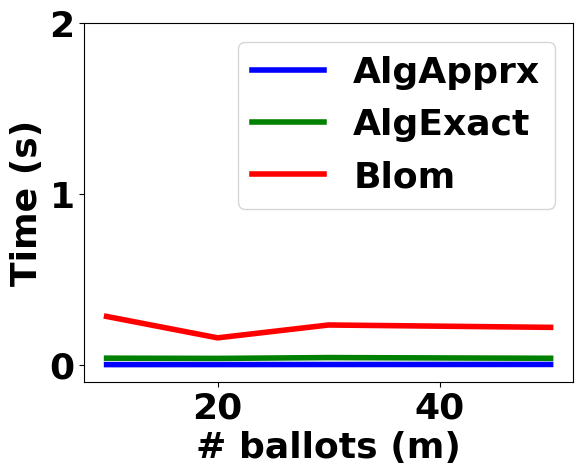

In [11]:
#import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.tight_layout()


x  = avgDf['Number_of_voters'].to_list()
y = avgDf['heuristicV1_runtime'].to_list()
z = avgDf['Our_runtime'].to_list()
u = avgDf['Blom_runtime'].to_list()


plt.plot(x,y,color=hColor,linewidth=4)
plt.plot(x,z,color=oColor,linewidth=4)
plt.plot(x,u,color=bColor,linewidth=4)
plt.tight_layout()
# create an index for each tick position

plt.ylabel('Time (s)')
plt.xlabel('# ballots (m)')
#plt.xticks([4,6,8,10,12], ['4','6','8','10','12'])
plt.ylim(-2*5/100,2)

plt.legend(["AlgApprx","AlgExact","Blom"],loc='upper right')
fig.savefig(r"Figures/substitution_food_n=8_vary_m_runtime.pdf",dpi=2024,bbox_inches='tight')